### Context
--- 
The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

----- 

### Content
------
The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

### importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] =15
plt.rcParams['figure.figsize'] = (10,7)
#plt.rcParams['figure.facecolor'] = ''

### Reading data

In [3]:
# --- reading data
data = pd.read_csv(r'C:\Users\subha\Downloads\2021.csv')

### Data cleaning & Preparation 

In [4]:
# viewing table ... 
data.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
#### Checking columns  in table and its datatypes and null values.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [6]:
# counting coulmns and rows 
data.shape # 149 row & 20 column 

(149, 20)

In [7]:
# renaming ladder score to happiness score 
data.rename(columns = {'Ladder score':'Happiness score'}, inplace = True)

In [8]:
data.head()

,Country name,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


#### Renaming necessary columns for better understanding

In [9]:
data.rename(columns = {'Country name':'Country_name',
                       'Regional indicator':'Regional_indicator',
                               'Happiness score':'Happiness_score',
                               'Logged GDP per capita':'Logged_GDP_per_capita',
                               'Social support':'Social_support',
                               'Healthy life expectancy':'Healthy_life_expectancy',
                               'Freedom to make life choices':'Freedom_to_make_life_choices',
                               'Generosity':'Generosity',
                               'Perceptions of corruption':'Perceptions_of_corruption' 
                              }, inplace = True)

In [10]:
# Making new data frame
new_data = data[["Country_name","Regional_indicator","Happiness_score","Logged_GDP_per_capita","Social_support","Healthy_life_expectancy","Freedom_to_make_life_choices","Generosity","Perceptions_of_corruption"]]

In [11]:
new_data

,Country_name,Regional_indicator,Happiness_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [12]:
#checking null value
new_data.isnull().sum()


Country_name                    0
Regional_indicator              0
Happiness_score                 0
Logged_GDP_per_capita           0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
dtype: int64

Their are no null values in table.

---

## High level statistics

In [13]:
new_data.describe()

,Happiness_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


#### Observation:
Highest happniess score is 7.842000, lowest is 2.523000 and average is 5.532839 while deviation is 1.073924. 

Highest world GDP is 11.647000 & lowest is 6.635000 and average is 9.432208	

highest Social support is 0.983000 and lowest is 0.463000
 
Freedom to make life choices highest is 0.970000 and lowest is 0.382000	

min Healthy life expectancy is 48.478000, max is 76.953000 and average is 64.992799

highest Perceptions of corruption rate is 0.939000, minimum is 0.082000 and average is 0.727450

----

<AxesSubplot:>

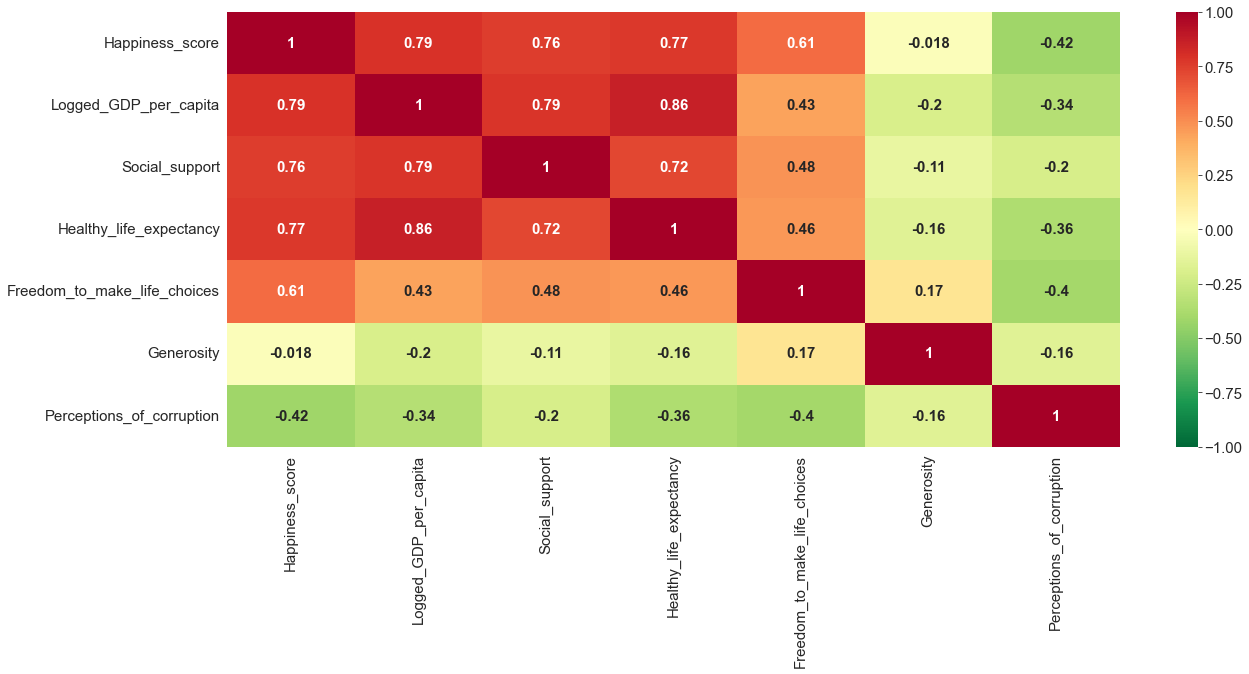

In [14]:
cols = new_data[['Happiness_score','Logged_GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']]
#
plt.figure(figsize=(20,8))
#
sns.heatmap(cols.corr(),annot=True, cmap = 'RdYlGn_r' ,annot_kws={"size":15, "weight":"bold"} , vmin=-1 , vmax= 1)

#### Observation:
The happiness score is highly corraleted with GDP per capita, social support and life excpectancy and average with freedom to make life choices. 

The social support is highly correlated with GDP per capita,happiness and life excpectancy

The life excpectancy is highly correlated with GDP per capita.


In [15]:
#sns.heatmap(cols.corr())

### Is hapiness  depend on  gdp ?

Text(0, 0.5, 'GDP Per capita')

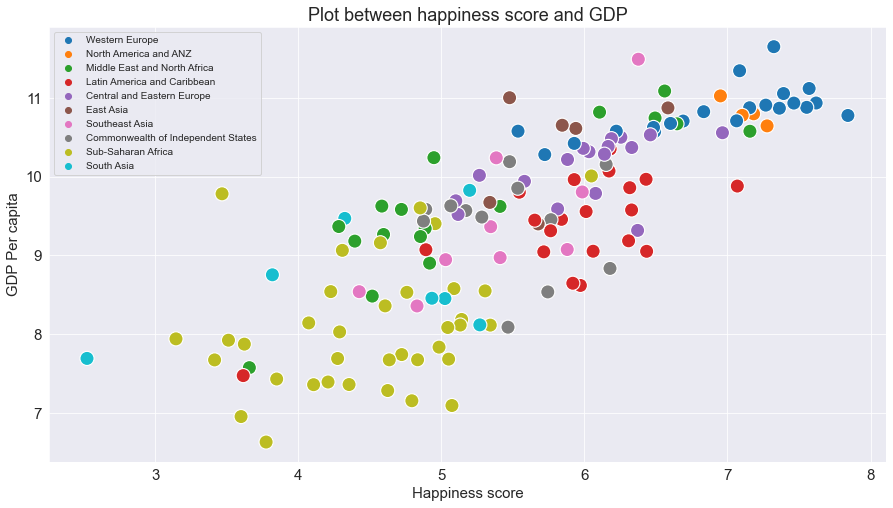

In [16]:
## plot between happiness and gdp 
plt.rcParams['figure.figsize'] = (15,8)
plt.title('Plot between happiness score and GDP')
sns.scatterplot(x= new_data.Happiness_score,y= new_data.Logged_GDP_per_capita , hue = new_data.Regional_indicator ,s =200)
plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness score')
plt.ylabel('GDP Per capita')

Yes, Happiness of country is depend on GDP 
Through visualization we can see country happiness is high if GDP per capital is high

---

In [17]:
new_data.head()

,Country_name,Regional_indicator,Happiness_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


------------------

### Is hapiness depend on  social support?

Text(0.5, 0, 'Social_support')

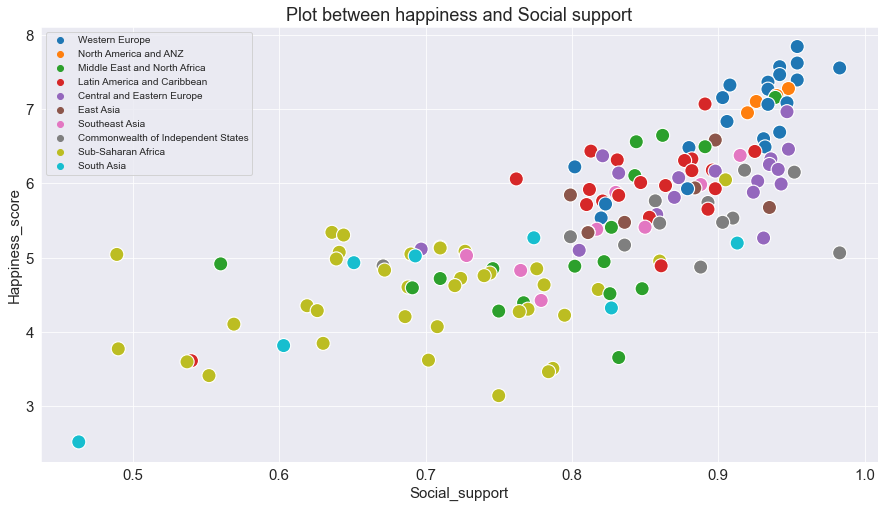

In [18]:
## plot between gdp and social support
plt.rcParams['figure.figsize'] = (15,8)
plt.title('Plot between happiness and Social support')
sns.scatterplot(x= new_data.Social_support,y= new_data.Happiness_score , hue = new_data.Regional_indicator ,s =200)
plt.legend(loc = 'upper left', fontsize = '10')
plt.ylabel('Happiness_score')
plt.xlabel('Social_support')

Yes, Happiness of country is depend on social support.Through visualization we can see country happiness is high if social support is high.

Outlier can also been seen in light blue color which belong to south asia region,we can assume that it is a Afghanistan which has such low value because of what recently happend.

---------------

In [19]:
### Plotting pairwise relationships in the data set


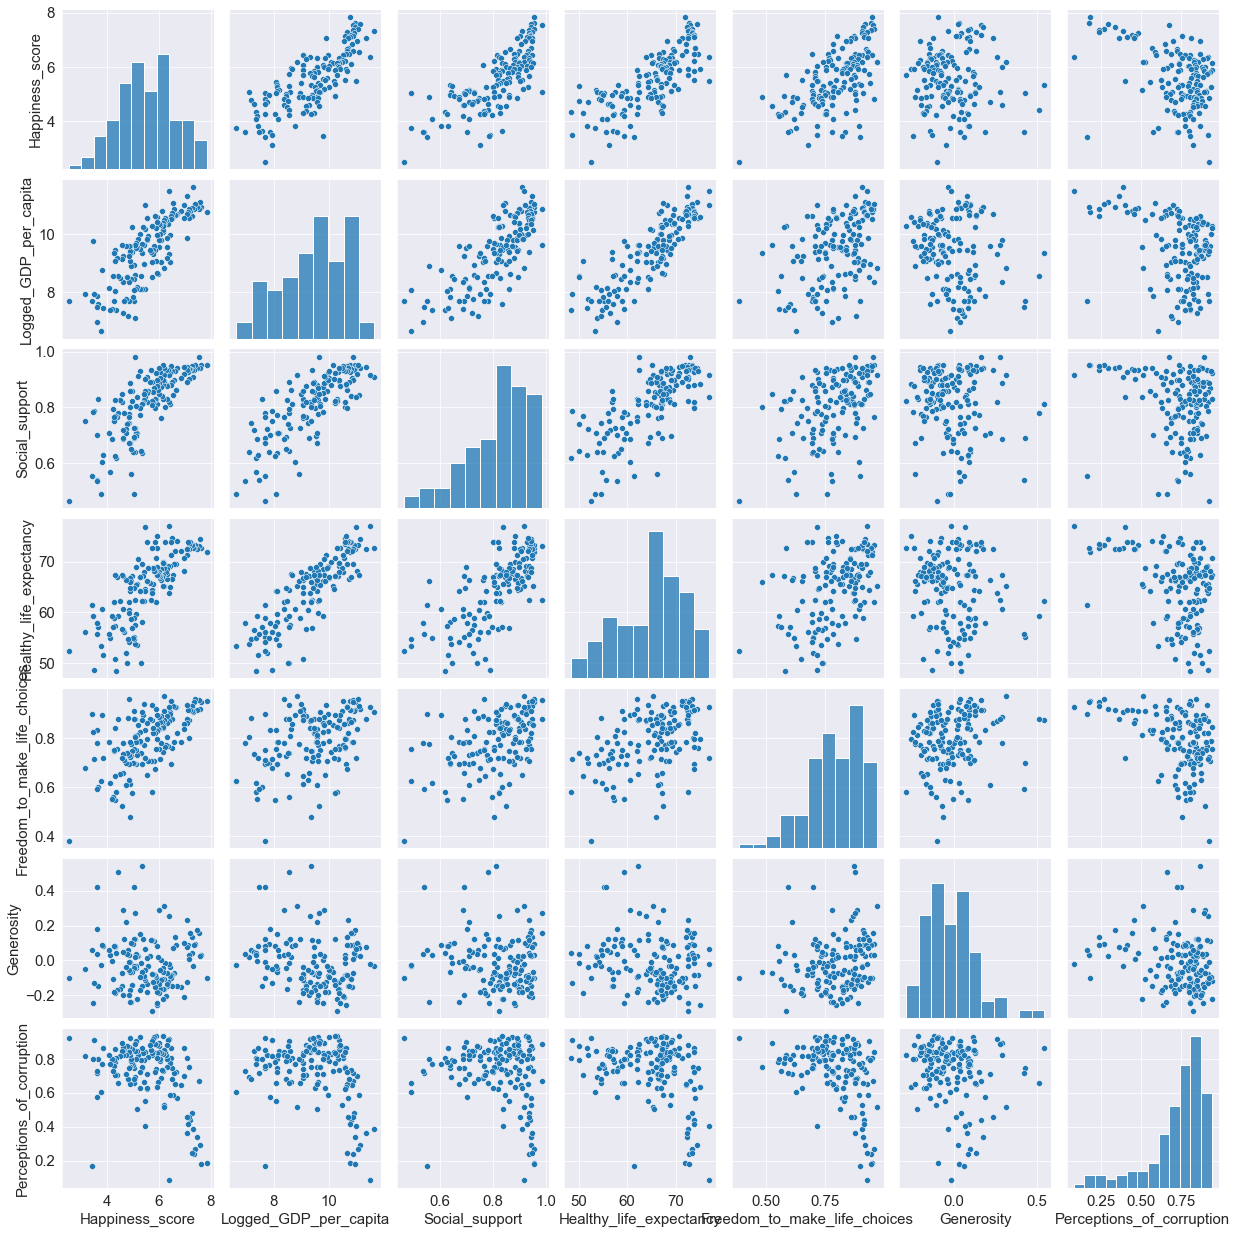

In [20]:
sns.pairplot(new_data)

In [21]:
 ### Which  region contributing most to world GDP? 

In [22]:
#var = new_data.groupby(['Regional_indicator'])['Logged_GDP_per_capita'].agg(['sum'])
#var

In [23]:
pie_value_chart = new_data.groupby('Regional_indicator')['Logged_GDP_per_capita'].sum()
pie_value_chart

Regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: Logged_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

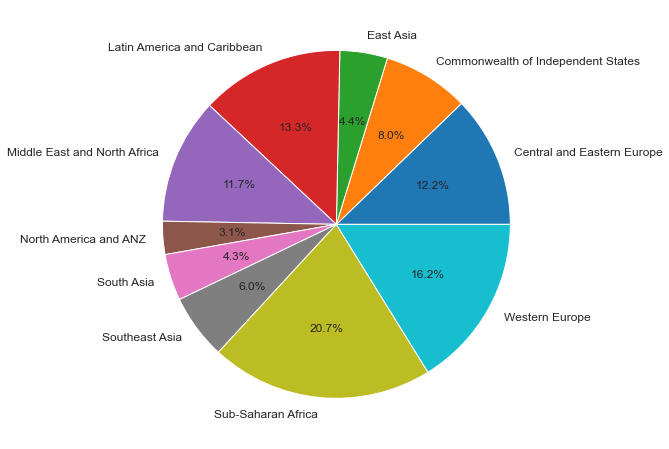

In [24]:

pie_value_chart.plot.pie( autopct = '%1.1f%%', fontsize = '12')
plt.xlabel('')
plt.ylabel('')


Pie chart clearly depict contribution of a GDP BY Regions

Highest World GDP contributor are sub-saharan africa which comprise of 54 countries and western europe that is 20.7% and 16.2% respectively,
Lowest World GDP contributor are north-america and ANZ & south asia that is 3.1% and 4.3% respectively. While other region has decent contribution to  world GDP.





---

In [25]:
new_data.head()

,Country_name,Regional_indicator,Happiness_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


-----

### Which are the most Corrupte region ? 

In [26]:
crrup_char = new_data.groupby('Regional_indicator')[['Perceptions_of_corruption']].mean()
crrup_char

,Perceptions_of_corruption
Regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

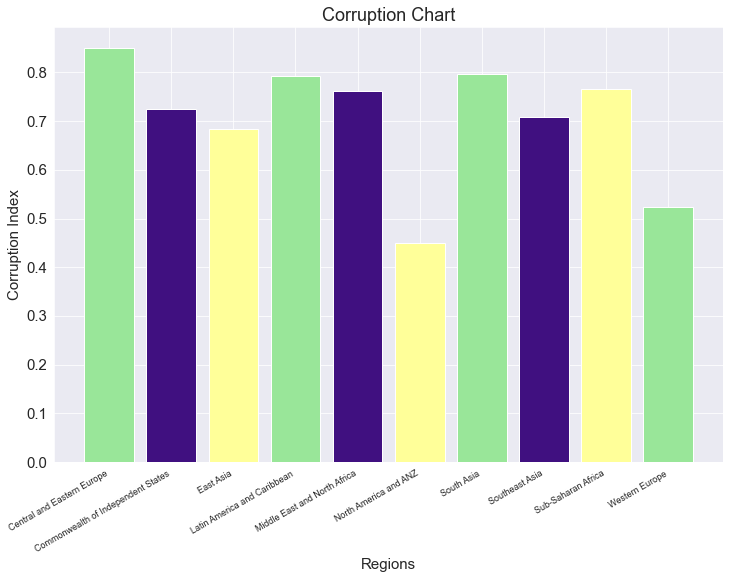

In [27]:
plt.rcParams['figure.figsize'] = [12,8]
plt.title('Corruption Chart')
plt.xlabel('Regions')
plt.ylabel('Corruption Index')
plt.xticks(rotation =30, ha ='right' ,fontsize = '9')
plt.bar(crrup_char.index, crrup_char.Perceptions_of_corruption ,  color=['#99e699','#401080','#ffff99'])

North America and ANZ and western Europe has  least corruptions rate, while Central and Eastern Europe and South asia has highest corruptions rate. This are the reason why Central and Eastern Europe, south Asia and Latin America and Caribbean has a low happiness score. 

----

In [28]:
x = new_data['Regional_indicator']
y = new_data['Perceptions_of_corruption']




---



### Which are the top happpiest region 

In [29]:
h_s = new_data.groupby('Regional_indicator')[['Happiness_score']].mean().sort_values( by = 'Happiness_score' , ascending = False)
h_s

,Happiness_score
Regional_indicator,
North America and ANZ,7.128500
Western Europe,6.914905
Central and Eastern Europe,5.984765
Latin America and Caribbean,5.908050
East Asia,5.810333
Commonwealth of Independent States,5.467000
Southeast Asia,5.407556
Middle East and North Africa,5.219765
Sub-Saharan Africa,4.494472


<BarContainer object of 10 artists>

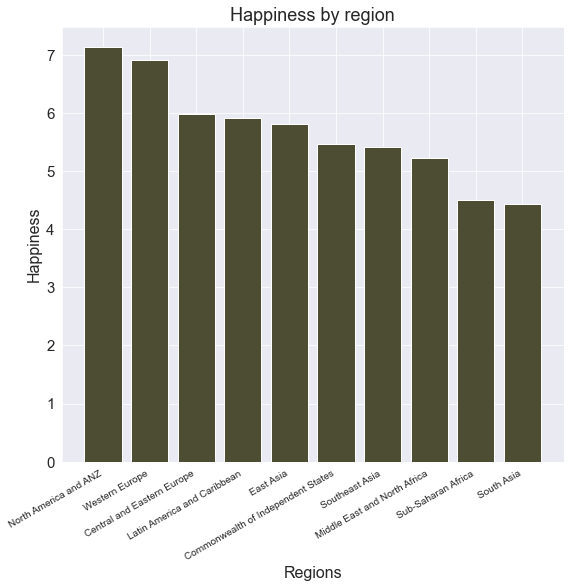

In [30]:
plt.rcParams['figure.figsize'] = [9,8]
plt.title('Happiness by region')
plt.xlabel('Regions' , fontsize ='16')
plt.ylabel('Happiness' , fontsize ='16')
plt.xticks(rotation =30, ha ='right', fontsize ='10')
plt.bar(h_s.index, h_s.Happiness_score , color='#4d4d33')

TOP Happiest region are North America and Anz and Western europe, While South Asia and Sub- Saharan Africa least happiest region.

---- 

In [31]:
new_data.head()

,Country_name,Regional_indicator,Happiness_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


------




### Which region has Good  social support 

In [32]:
social = new_data.groupby(['Regional_indicator'])[['Social_support']].mean().sort_values(by = 'Social_support' , ascending = False)
social

,Social_support
Regional_indicator,
North America and ANZ,0.933500
Western Europe,0.914476
Central and Eastern Europe,0.887412
Commonwealth of Independent States,0.872500
East Asia,0.860500
Latin America and Caribbean,0.839500
Southeast Asia,0.820333
Middle East and North Africa,0.797647
South Asia,0.703429


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

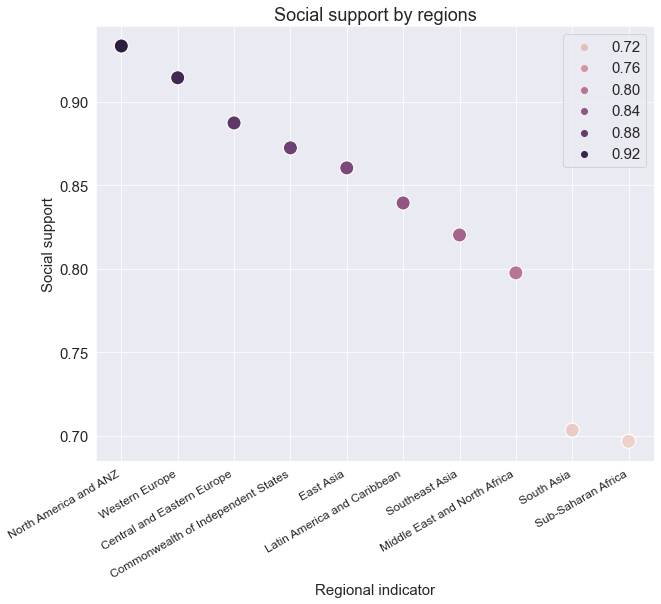

In [33]:
## plot between regional_indicator and Social_support 
plt.rcParams['figure.figsize'] = (10,8)
plt.title('Social support by regions')
sns.scatterplot(x= social.index,y= social.Social_support , hue = social.Social_support ,s =200)
plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Regional indicator')
plt.ylabel('Social support')
plt.legend(loc = "best")
plt.xticks(rotation =30, ha ='right', fontsize ='12')


Another reason North America and Anz and western Europe happiest region because they have highest social support, Sub-Saharan Africa and south Asia are less socially supported region  

----

#### Top happiest  country 

In [34]:
c_s = new_data[['Country_name','Happiness_score']]
c = c_s.head(10)
## top happiest and socially supported country 

Text(0.5, 1.0, 'Top happiest  country ')

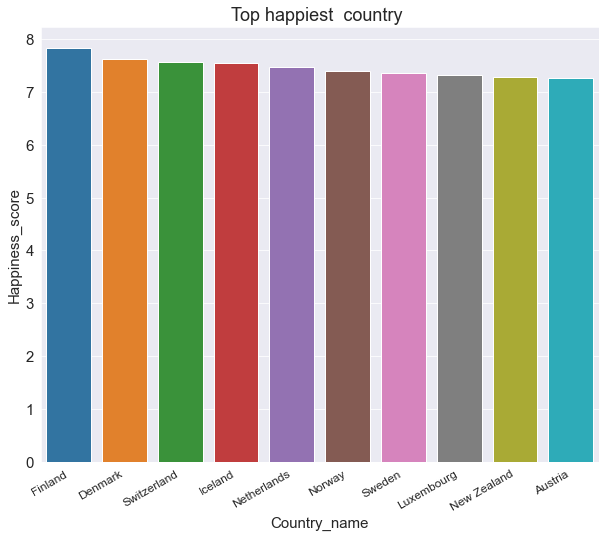

In [35]:
sns.barplot(x = 'Country_name', y = 'Happiness_score', data = c )
plt.xticks(rotation =30, ha ='right', fontsize ='12')
plt.title('Top happiest  country ')


#### bottom happiest  country 

In [36]:
least = c_s.tail(10)
# least happiest and socially supported country a

In [37]:
#new_data[new_data['Healthy_life_expectancy'] > 70.953 ].head(10)

Text(0.5, 1.0, 'Bottom happiest  country ')

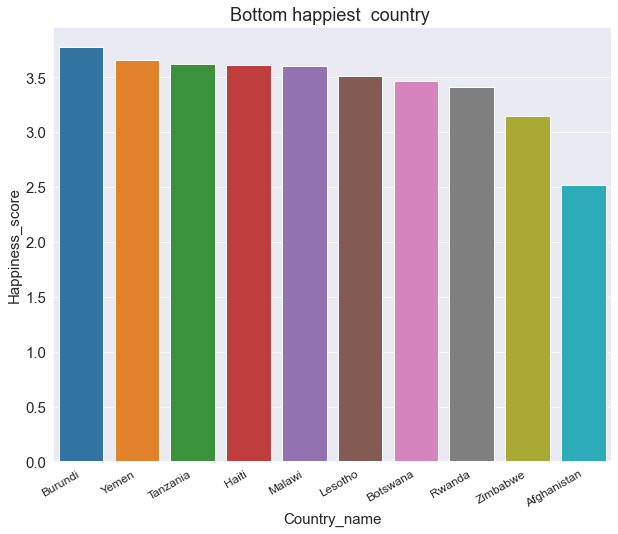

In [38]:
sns.barplot(x = 'Country_name', y = 'Happiness_score', data = least )
plt.xticks(rotation =30, ha ='right', fontsize ='12')
plt.title('Bottom happiest  country ')

---


### Which are the country  with hight  life expectancy

In [39]:
regional_life_expectancy = new_data[['Country_name','Healthy_life_expectancy']].sort_values(by = 'Healthy_life_expectancy' , ascending = False)
rr =regional_life_expectancy.head(10)

<BarContainer object of 10 artists>

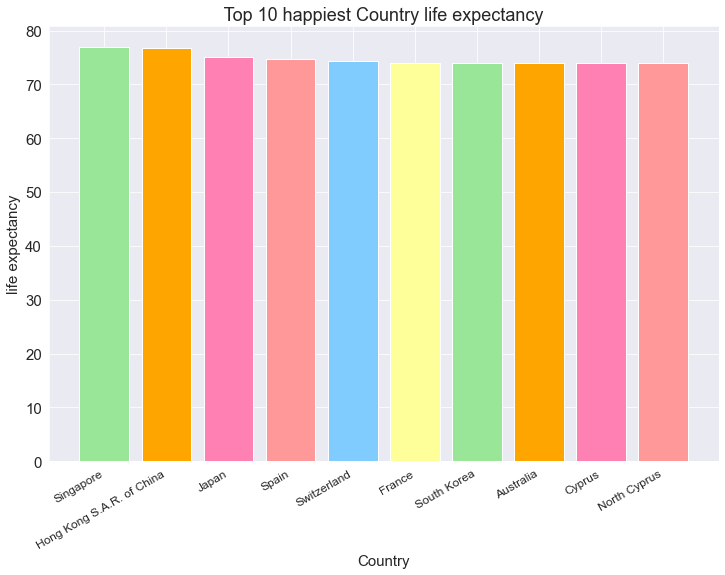

In [40]:
plt.rcParams['figure.figsize'] = [12,8]
plt.title(' Top 10 happiest Country life expectancy ')
plt.xlabel('Country')
plt.ylabel('life expectancy')
plt.xticks(rotation =30, ha ='right', fontsize ='12')

plt.bar(rr.Country_name, rr.Healthy_life_expectancy,  color=['#99e699','orange','#ff80b3','#ff9999','#80ccff','#ffff99'])


Top 10 happy Country life expectancy is above  70 years , the person who are from this country expected to live more than 70 years

---

### Which are the country  with low  life expectancy

In [41]:
sp =regional_life_expectancy.tail (10)
sp

,Country_name,Healthy_life_expectancy
90,Cameroon,53.515
139,Burundi,53.400
148,Afghanistan,52.493
116,Mali,51.969
137,Sierra Leone,51.651
129,Swaziland,50.833
84,Ivory Coast,50.114
115,Nigeria,50.102
144,Lesotho,48.700
127,Chad,48.478


<BarContainer object of 10 artists>

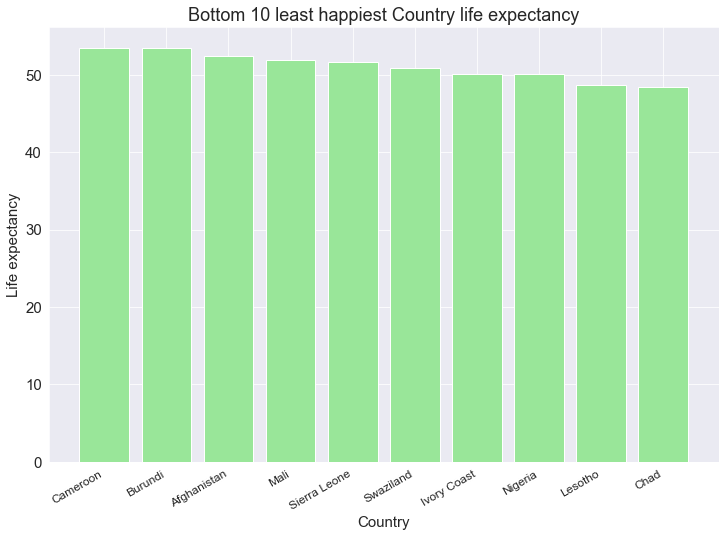

In [42]:
plt.rcParams['figure.figsize'] = [12,8]
plt.title(' Bottom 10 least happiest Country life expectancy ')
plt.xlabel('Country')
plt.ylabel('Life expectancy')
plt.xticks(rotation =30, ha ='right', fontsize ='12')

plt.bar(sp.Country_name, sp.Healthy_life_expectancy,  color=['#99e699'])

Bottom 10 happy Country life expectancy is below  62 years while lesotho is below 50 , the person who are from this country expected to live till 60 to 62 years.  

Top 10 happiest country  going to live 10  year more compare to bottom happiest country. 

----

## Top 10 countries for each attributes


<AxesSubplot:xlabel='Freedom_to_make_life_choices', ylabel='Country_name'>

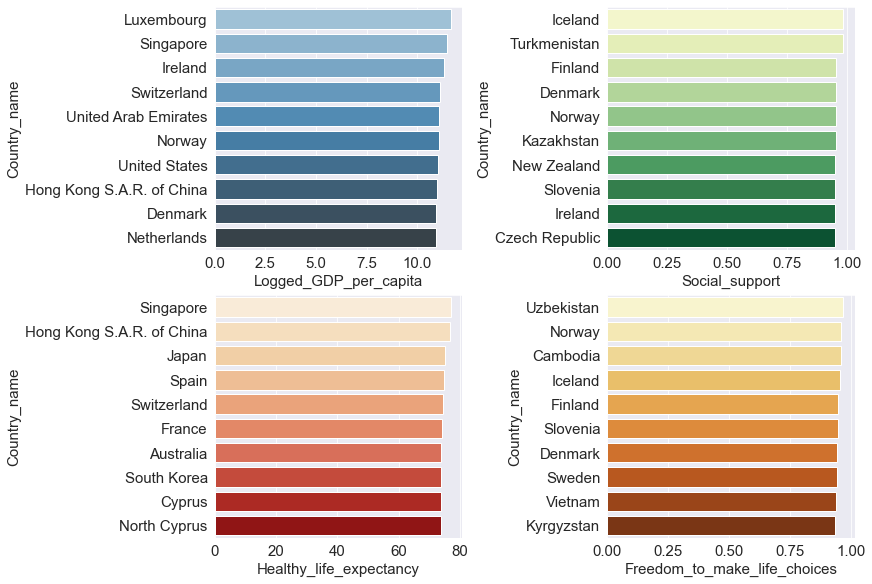

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Logged_GDP_per_capita',y='Country_name',data=new_data.nlargest(10,'Logged_GDP_per_capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social_support' ,y='Country_name',data=new_data.nlargest(10,'Social_support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy_life_expectancy' ,y='Country_name',data=new_data.nlargest(10,'Healthy_life_expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom_to_make_life_choices' ,y='Country_name',data=new_data.nlargest(10,'Freedom_to_make_life_choices'),ax=axes[1,1],palette='YlOrBr')



<AxesSubplot:xlabel='Generosity', ylabel='Country_name'>

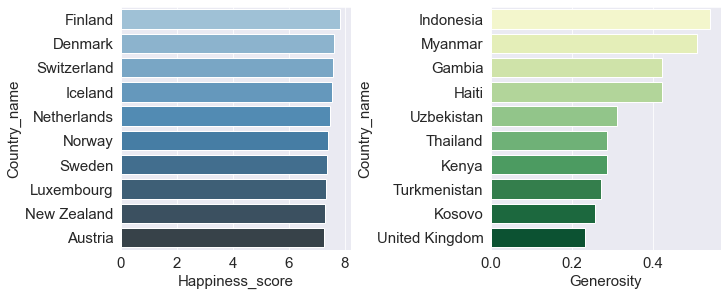

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))


sns.barplot(x='Happiness_score',y='Country_name',data=new_data.nlargest(10,'Happiness_score'),ax=axes[0],palette="Blues_d")

sns.barplot(x='Generosity',y='Country_name',data=new_data.nlargest(10,'Generosity'),ax=axes[1],palette="YlGn")


## Top 10 bottom country for each attributes

<AxesSubplot:xlabel='Freedom_to_make_life_choices', ylabel='Country_name'>

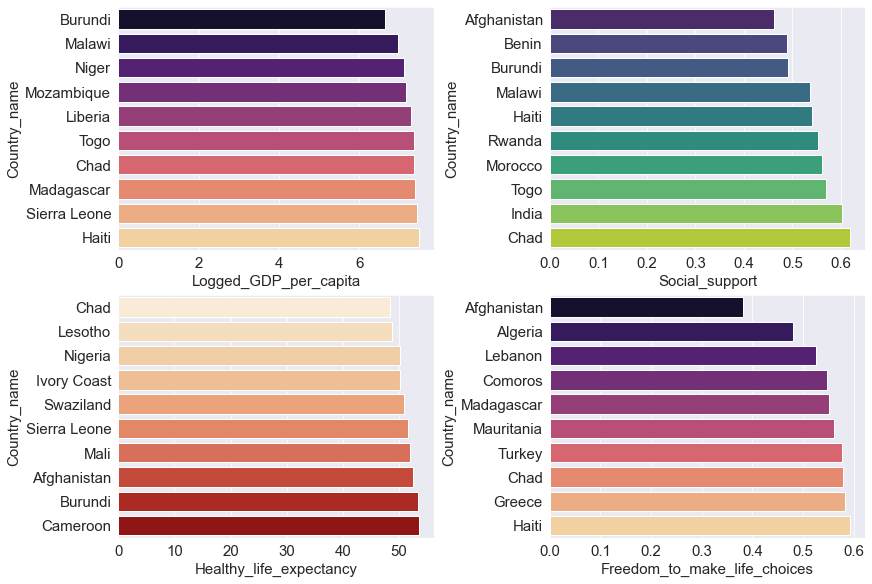

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Logged_GDP_per_capita',y='Country_name',data=new_data.nsmallest(10,'Logged_GDP_per_capita'),ax=axes[0,0],palette="magma")

sns.barplot(x='Social_support' ,y='Country_name',data=new_data.nsmallest(10,'Social_support'),ax=axes[0,1],palette="viridis")

sns.barplot(x='Healthy_life_expectancy' ,y='Country_name',data=new_data.nsmallest(10,'Healthy_life_expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom_to_make_life_choices' ,y='Country_name',data=new_data.nsmallest(10,'Freedom_to_make_life_choices'),ax=axes[1,1],palette='magma')



<AxesSubplot:xlabel='Generosity', ylabel='Country_name'>

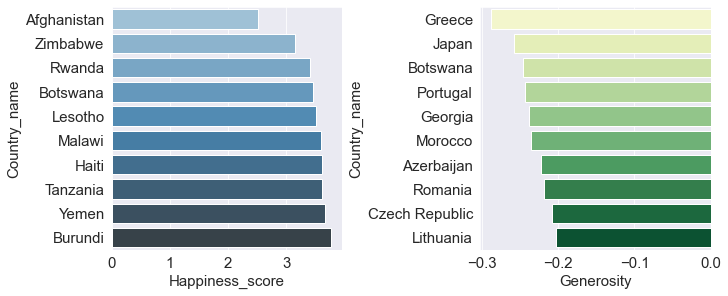

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))


sns.barplot(x='Happiness_score',y='Country_name',data=new_data.nsmallest(10,'Happiness_score'),ax=axes[0],palette="Blues_d")

sns.barplot(x='Generosity',y='Country_name',data=new_data.nsmallest(10,'Generosity'),ax=axes[1],palette="YlGn")


(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

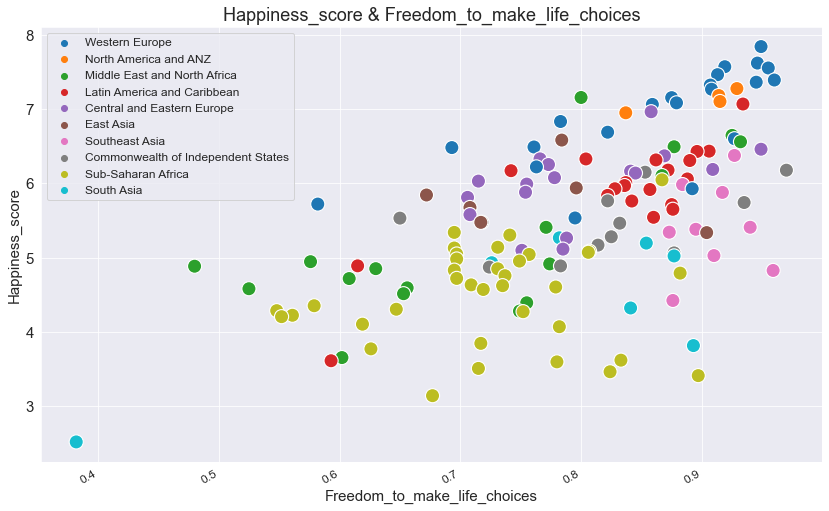

In [47]:
plt.rcParams['figure.figsize'] = (14,8)
plt.title('Happiness_score & Freedom_to_make_life_choices')
sns.scatterplot(x= new_data.Freedom_to_make_life_choices,y= new_data.Happiness_score , hue = new_data.Regional_indicator ,s =200)
plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Freedom_to_make_life_choices')
plt.ylabel('Happiness_score')
plt.legend(loc = "best" , fontsize ='12')
plt.xticks(rotation =30, ha ='right', fontsize ='12')



yes, those country has Freedom to make life choices are happy. 
Western europe and North America and Anz Freedom to make life choice is more so is Happiness score while 
sub-saharan africa and other regions has decent Freedom to make life choice so is Happiness score.

In south aisa has decent Freedom to make life choice so is Happiness score, while there is a few country such as Afghanistan(outlier) in south aisa region which has less Freedom to make life choice so people of that country are less Happy.


---

## Comparison of India with it is neighbour country

In [48]:
south_a = new_data[new_data['Regional_indicator'] == 'South Asia']
south_a

,Country_name,Regional_indicator,Happiness_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
86,Nepal,South Asia,5.269,8.120,0.774,64.233,0.782,0.152,0.727
88,Maldives,South Asia,5.198,9.826,0.913,70.600,0.854,0.024,0.825
100,Bangladesh,South Asia,5.025,8.454,0.693,64.800,0.877,-0.041,0.682
104,Pakistan,South Asia,4.934,8.458,0.651,58.709,0.726,0.098,0.787
128,Sri Lanka,South Asia,4.325,9.470,0.827,67.299,0.841,0.079,0.863
138,India,South Asia,3.819,8.755,0.603,60.633,0.893,0.089,0.774
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


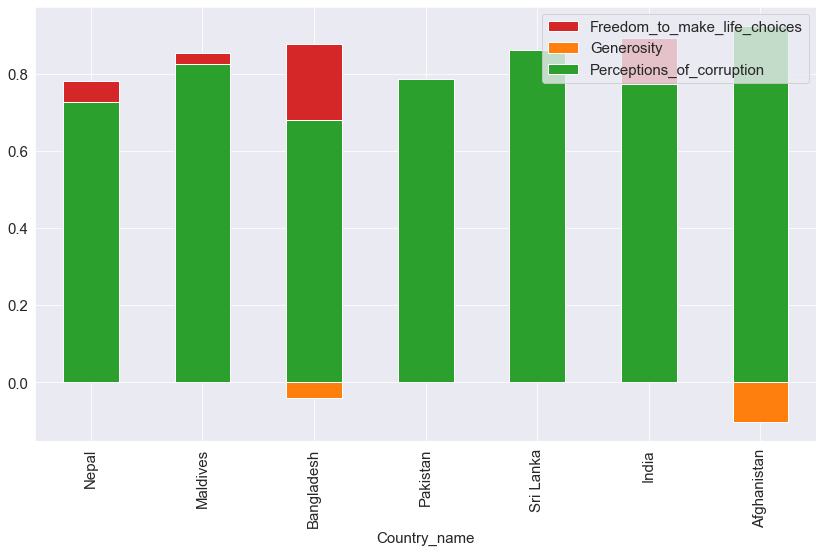

In [60]:
ax = south_a.plot(y="Freedom_to_make_life_choices", x="Country_name", kind="bar",color='C3')
south_a.plot(y="Generosity", x="Country_name", kind="bar", ax=ax, color="C1")
south_a.plot(y="Perceptions_of_corruption", x="Country_name", kind="bar", ax=ax, color="C2")
plt.show()

In [58]:
cty = south_a["Country_name"]
gdp = south_a["Logged_GDP_per_capita"]
ss = south_a["Social_support"]
life = south_a["Healthy_life_expectancy"]

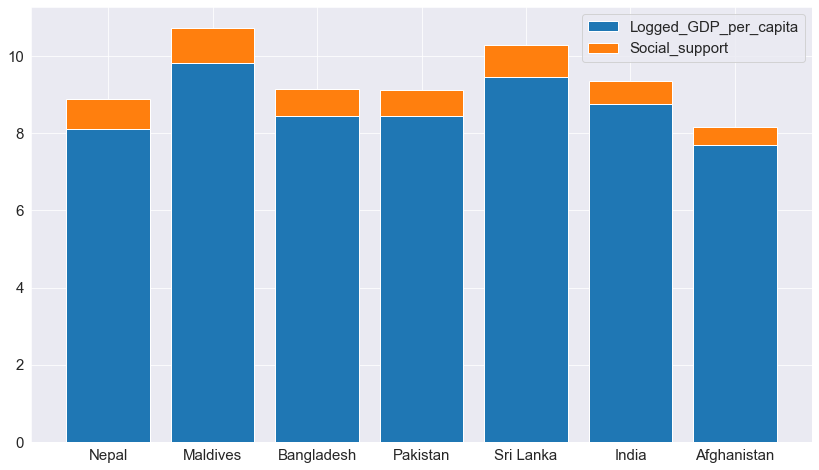

In [59]:
plt.bar(cty,gdp, label="Logged_GDP_per_capita")
plt.bar(cty,ss, bottom =gdp,label="Social_support" )
plt.legend()

